## Polynomial Regression
Example scenario: HR team about to hire a new employee so need to negotiate future salary for this new hire. He says he made 160K at his old job. Only get this dataset/table of salaries, so HR wants to create a bluffing detector to run a model to predict whether this potential hire actually made 160K at previous job.

The machine is the polynomial regression. This machine is going to learn the correlation between the levels and salaries to predict if the hire is bluffing about his salary. 

## Data pre-processing template

Here's the data preprocessing template we came up with:

### Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset
**Note** You must use .values to convert to nparray
dataset = pd.read_csv("Data.csv")
X = dataset.iloc[:, :-1].values
y = datset.iloc[:, 3].values
**Note** the .shape of X, even if single column, should be (n, 1) not (n,). The .shape of y needs to be (n,).

### Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = "NaN", strategy = "mean", axis = 0)
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

### Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

### Splitting the dataset into the Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)"""

## Polynomial Regression - Step 1

In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset
# Handy tip: X must be a DF/Matrix, not a Series/Vector
# Therefore use .iloc[:, 1:2] instead of [:, 1]
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

# Splitting the dataset ino the Training set and Test set
# **In this case, the dataset is too small to require splitting
# the dataset. We need it to make the most accurate prediction,
# so it's better to use the whole dataset to train the ML model

# Feature Scaling -- NOT needed this time
# Polynomial regression just consists of adding PNR terms
# into the MLR equation, so we will use the same LinearRegression
# library that we used for SLR and MLR, which is the library
# that does feature scaling itself, so not needed.
# Ready to move on to the next step.

## Polynomial Regression - Step 2
We're goig to build a linear regression model and we're going to create polynomial regression model using the polynomial features class (from sklearn.preprocessing import PolynomialFeatures) and fit it to the dataset. Why?

Because we want to use the simple linear regression model as something to compare against our polynomial regression results

In [4]:
# Creating a simple linear regression model and fitting
# linear regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# Now time to build the polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

# Next need to create an object of this Polynomial Features Class
# This object is going to be a transformer tool that will
# transform our matrix of features (X) into a new matrix of 
# features (X_poly) containing X1 and X1^2, X1^3, etc. to whatever
# we want and the same independent variable to the n power.

poly_reg = PolynomialFeatures(degree = 4) 
# degree = n will add the exponential column. This degree influences
# the accuracy of the predictions

# the poly_reg tool will add additional polynomial terms to X
# Need to use .fit_transform - first .fit it to X and then
# .transform it into X_poly.
# **This poly_reg tool also automatically adds a beta_0 constant
X_poly = poly_reg.fit_transform(X)

In [22]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [23]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [24]:
# Next, need to include this fit into a MLR model
# Need to create a new LR object (lin_reg2) so we can include 
# this fit we made with our poly_reg object and our X_poly
# matrix of features
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Polynomial Regression - Step 3
Going to visualize the results of both of these models (SLR and PNR)

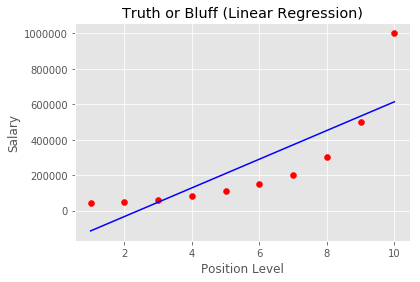

In [11]:
# Visualize the Linear Regression results

# Plot all true observation points and then compare to
# predictions from the models
plt.style.use(style = 'ggplot')
plt.scatter(x = X, y = y, color = 'red')

# Next, plot the predicted salaries from the SLR model
# So need to call lin_reg.predict(X) to get predictions
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

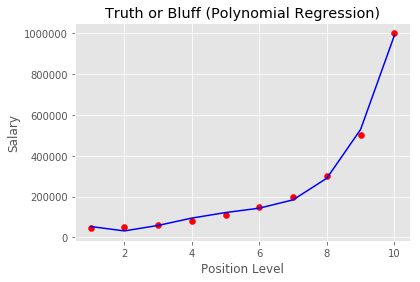

In [25]:
# Clearly need to make a better model that better matches
# the actual observations. So need to call 
# lin_reg_2.predict(X) to get predictions
plt.style.use(style = 'ggplot')
plt.scatter(x = X, y = y, color = 'red') 

# Important - lin_reg_2 is actually still a simple LR object
# Need to add polynomial features/terms of independent vars 
# You would think that you simply need to input X_poly
# However, X_poly is already defined for an existing matrix 
# So, instead need to input poly_reg.fit_transform(X).
# 'X' could be any existing/new matrix of features. This makes
# the model/code more versitile for future/new observations
plt.plot(X, lin_reg_2.predict(X = poly_reg.fit_transform(X)), color = 'blue')

plt.title("Truth or Bluff (Polynomial Regression)") 
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

#### How to make it perform better? Add a degree to the PNR model!
Change poly_reg from degree = 2 to degree = 3 (or 4, etc.). If you want even better accuracy, you can change the x-axis increments from 1 to like 0.1. To do that, create a new var called X_grid = np.arange(min(X), max(X), 0.1). This returns a vector but we need it to be a matrix. Therefore, need to use the .reshape() function to reshape X_grid into a matrix where the number of lines is equal to the number of elements of X_grid (len(X_grid) and the number of columns (1). See below code.

X_grid will contain all the Levels (1-10) plus all the incremental steps between each level as defined by step = 0.1.

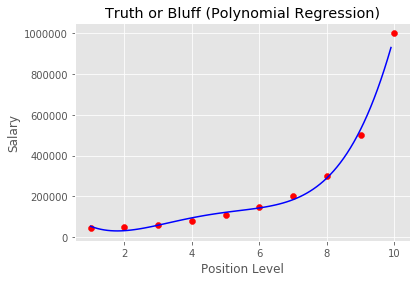

In [33]:
# Clearly need to make a better model that better matches
# the actual observations. So need to call 
# lin_reg_2.predict(X) to get predictions
plt.style.use(style = 'ggplot')

# See "HOw to make it perform better?" for X_grid
X_grid = np.arange(start = min(X), stop = max(X), step = 0.1)
X_grid = X_grid.reshape((len(X_grid), 1)) # needs to be tuple
plt.scatter(x = X, y = y, color = 'red') 

# Important - lin_reg_2 is actually still a simple LR object
# Need to add polynomial features/terms of independent vars 
# You would think that you simply need to input X_poly
# However, X_poly is already defined for an existing matrix 
# So, instead need to input poly_reg.fit_transform(X).
# 'X' could be any existing/new matrix of features. This makes
# the model/code more versitile for future/new observations

# Need to replace X with X_grid so that it will predict all salaries
# for the imaginary 90 levels (1,1.1,1.2, etc.).
plt.plot(X_grid, lin_reg_2.predict(X = poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title("Truth or Bluff (Polynomial Regression)") 
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Polynomial Regression - Step 4
Now we need to predict the salary of the potential hire based on a Level = 6.5 to determine whether 160,000 is a bluff or not.

Steps:
1. Predict the result using the Linear Regression
2. Predict the result using the Polynomial Regression

In [38]:
# Predict the result using Linear Regression
lin_reg.predict(6.5)

array([330378.78787879])

In [39]:
# Predict the result using the Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform(6.5))

array([158862.45265153])